## Importer les packages et chargement de données

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Charger les données
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
# Analyse de dimension
df.shape

(545, 13)

In [4]:
# Description des données quantitatives
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [5]:
# Description des données qualitatives
df.describe(include="object")

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


In [6]:
# Analyse du types de variables
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [7]:
# Analyse des données manquantes
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

## Analyse Univarié

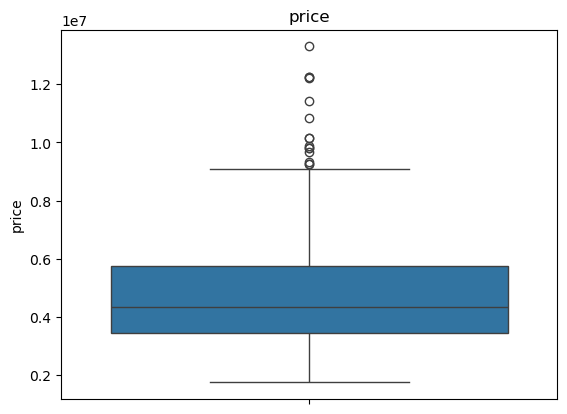

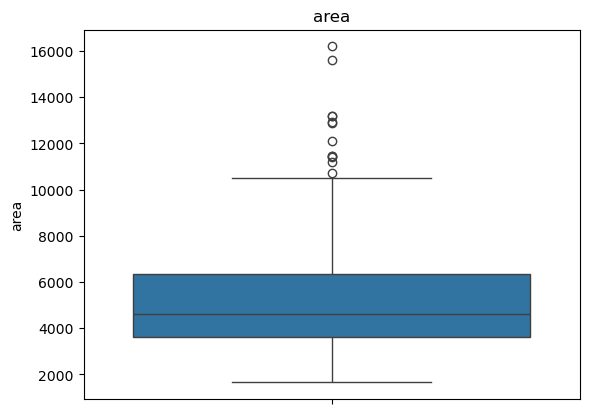

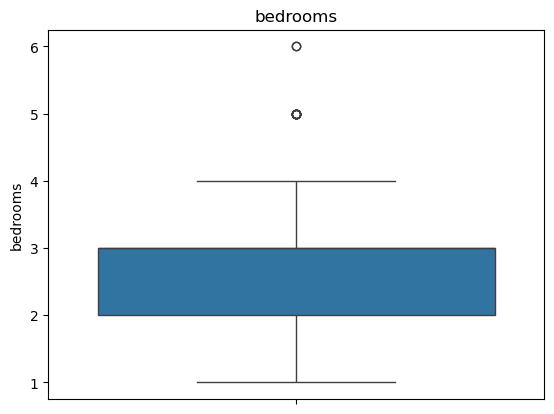

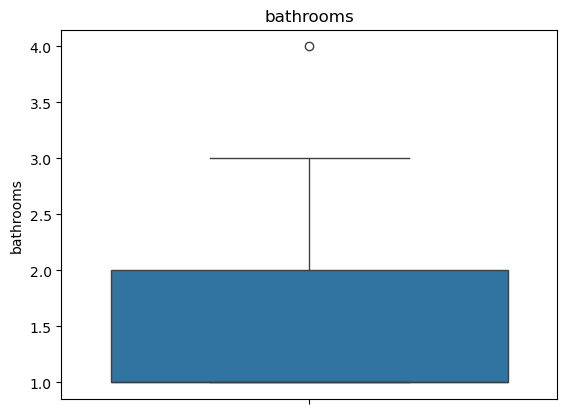

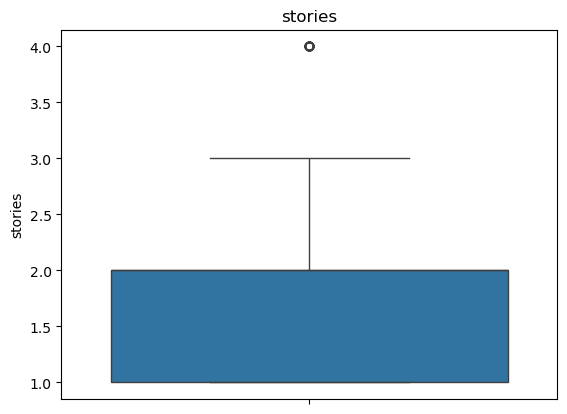

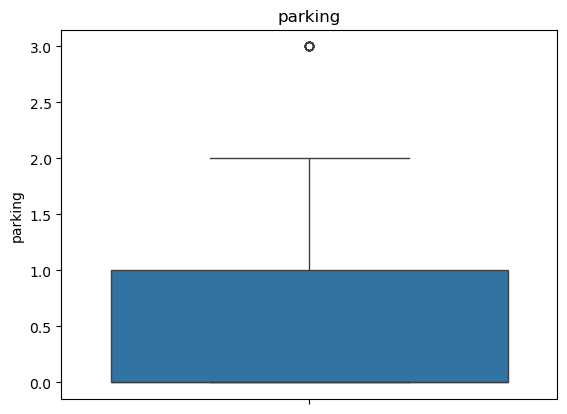

In [8]:
# Analyse Graphique des variables quantitatives

# Sélection des variables quantitatives

df_quant = df.select_dtypes(include=['int'])

# Tracer un boxplot pour chaque variable
for var in df_quant:
    plt.title(f"{var}")
    sns.boxplot(y=var, data=df_quant)
    plt.show()

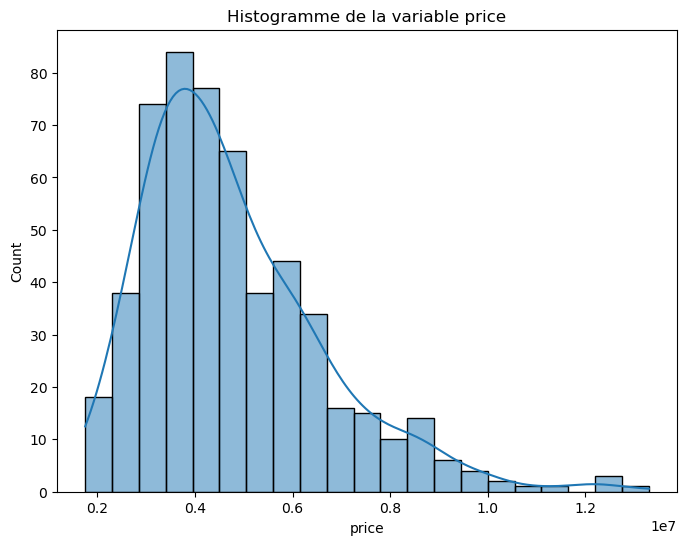

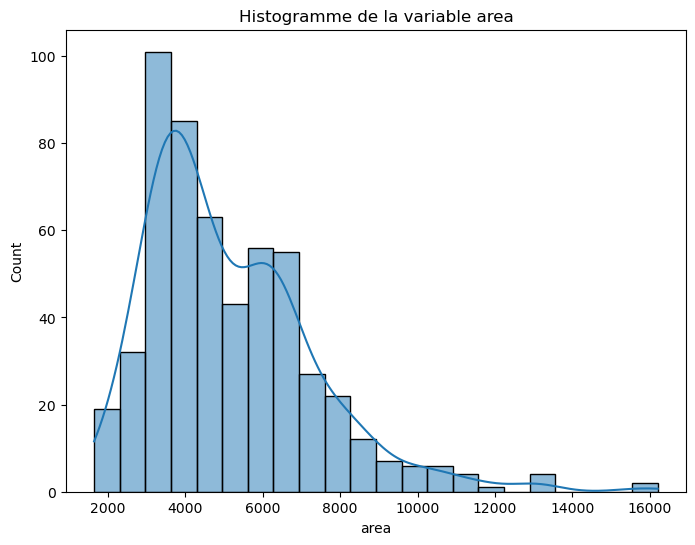

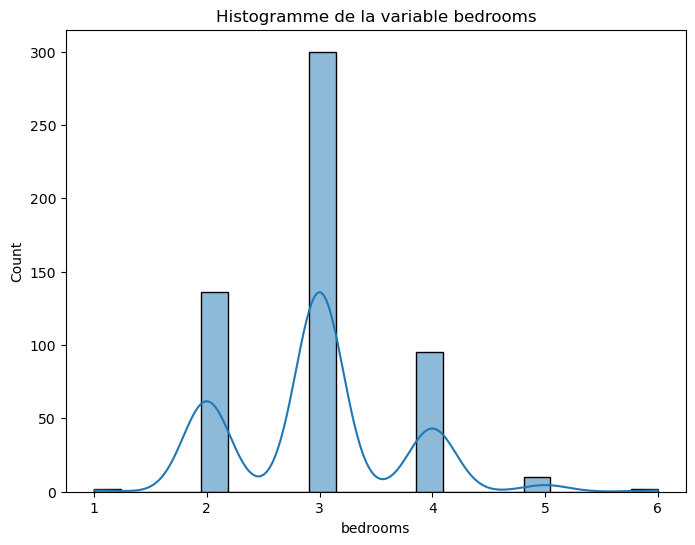

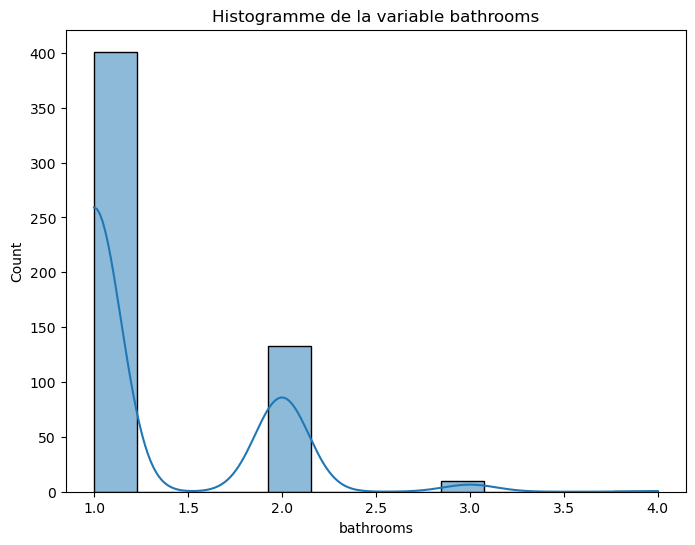

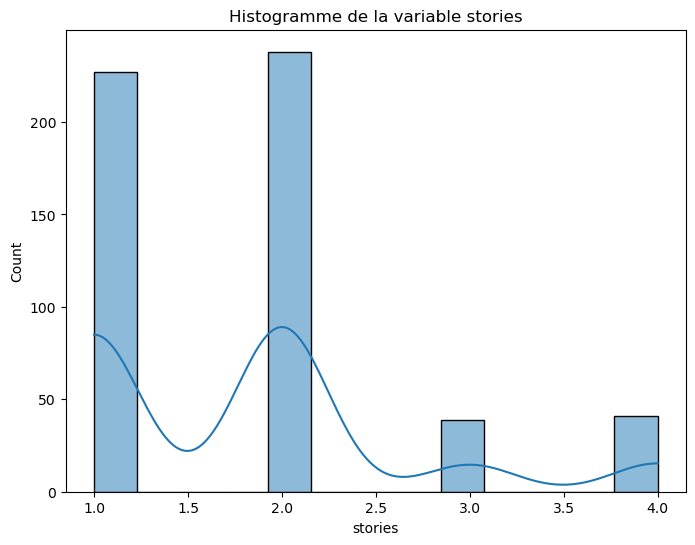

In [9]:
# Histogramme des variables quantitatives

for column in df_quant.columns[:-1]:
    plt.figure(figsize=(8,6))
    sns.histplot(data=df_quant, x=column, kde=True)
    plt.title(f"Histogramme de la variable {column}")
    plt.show

In [10]:
# Test de normalité des variables quantitatives
import scipy.stats as stats

for column in df_quant.columns[:-1]:
    statistic, p_value = stats.normaltest(df_quant[column])
    if p_value < 0.05:
        print(f"La variable {column} ne suit pas une loi normale (p-value={p_value})")
    else:
        print(f"La variable {column} suit une loi normale (p-value={p_value})")

La variable price ne suit pas une loi normale (p-value=7.060096507152579e-26)
La variable area ne suit pas une loi normale (p-value=6.732585875624122e-31)
La variable bedrooms ne suit pas une loi normale (p-value=7.838900986317864e-07)
La variable bathrooms ne suit pas une loi normale (p-value=6.151418308348752e-35)
La variable stories ne suit pas une loi normale (p-value=1.7728939330977503e-18)


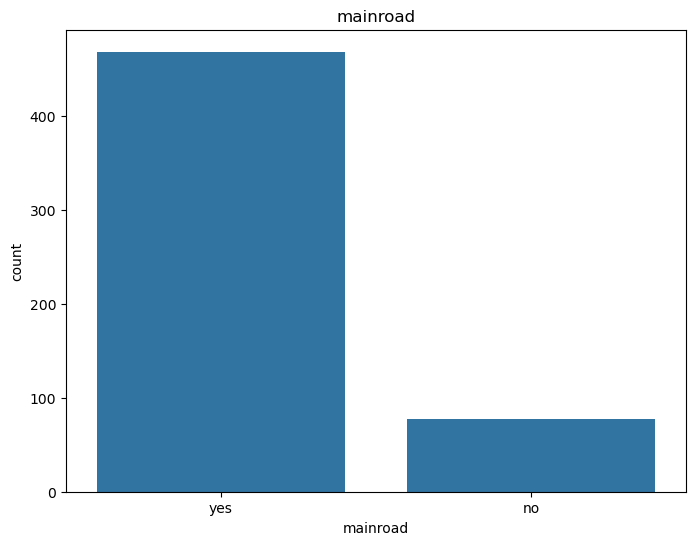

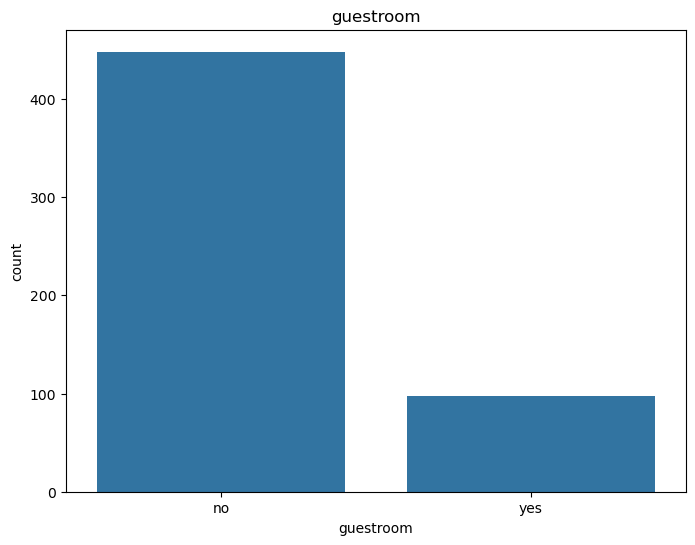

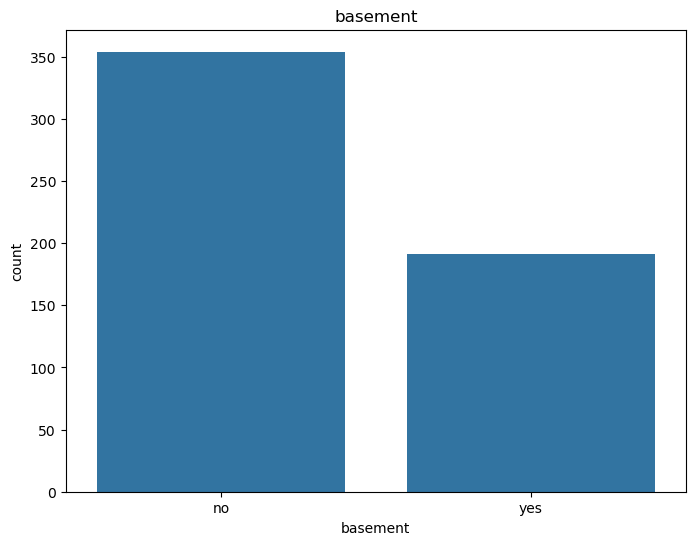

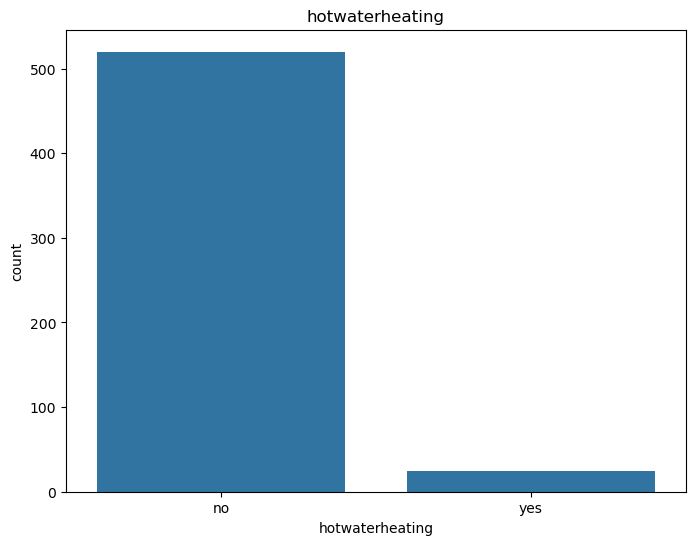

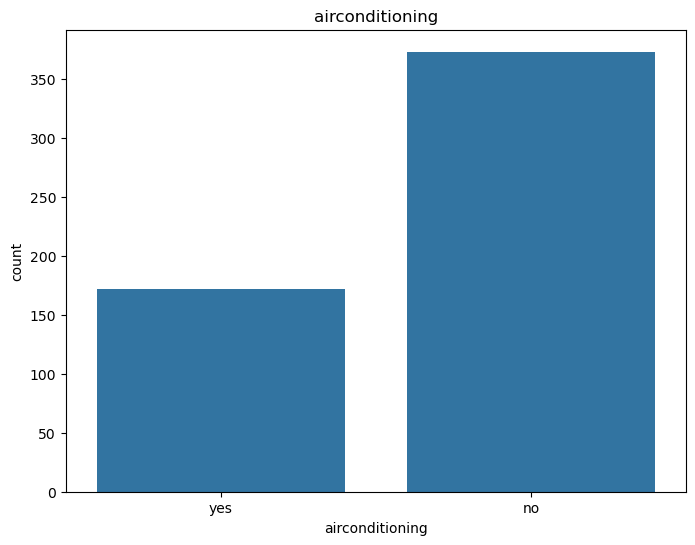

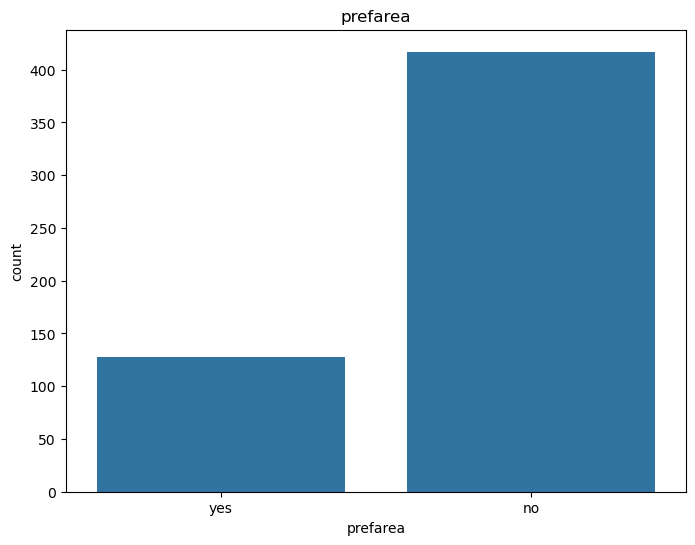

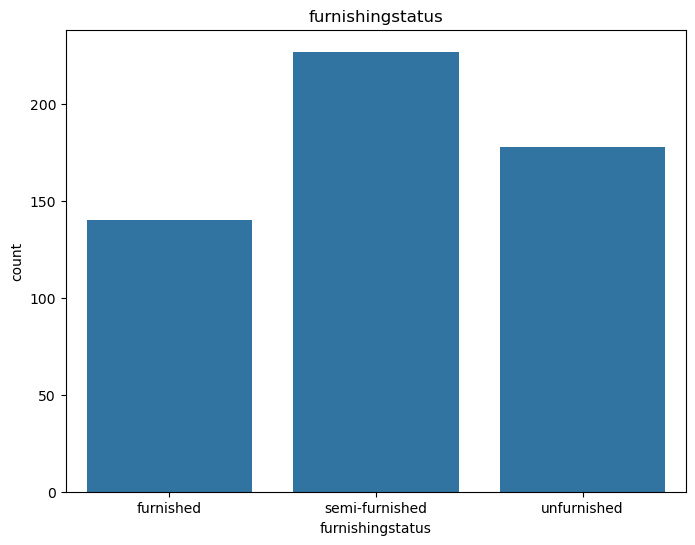

In [11]:
# Graphiques pour les variables qualitatives
df_qualit = df.select_dtypes(include=object)

for column in df_qualit.columns:
    plt.figure(figsize=(8,6))
    sns.countplot(x=column, data=df_qualit)
    plt.title(f"{column}")

## Analyse Bivariée

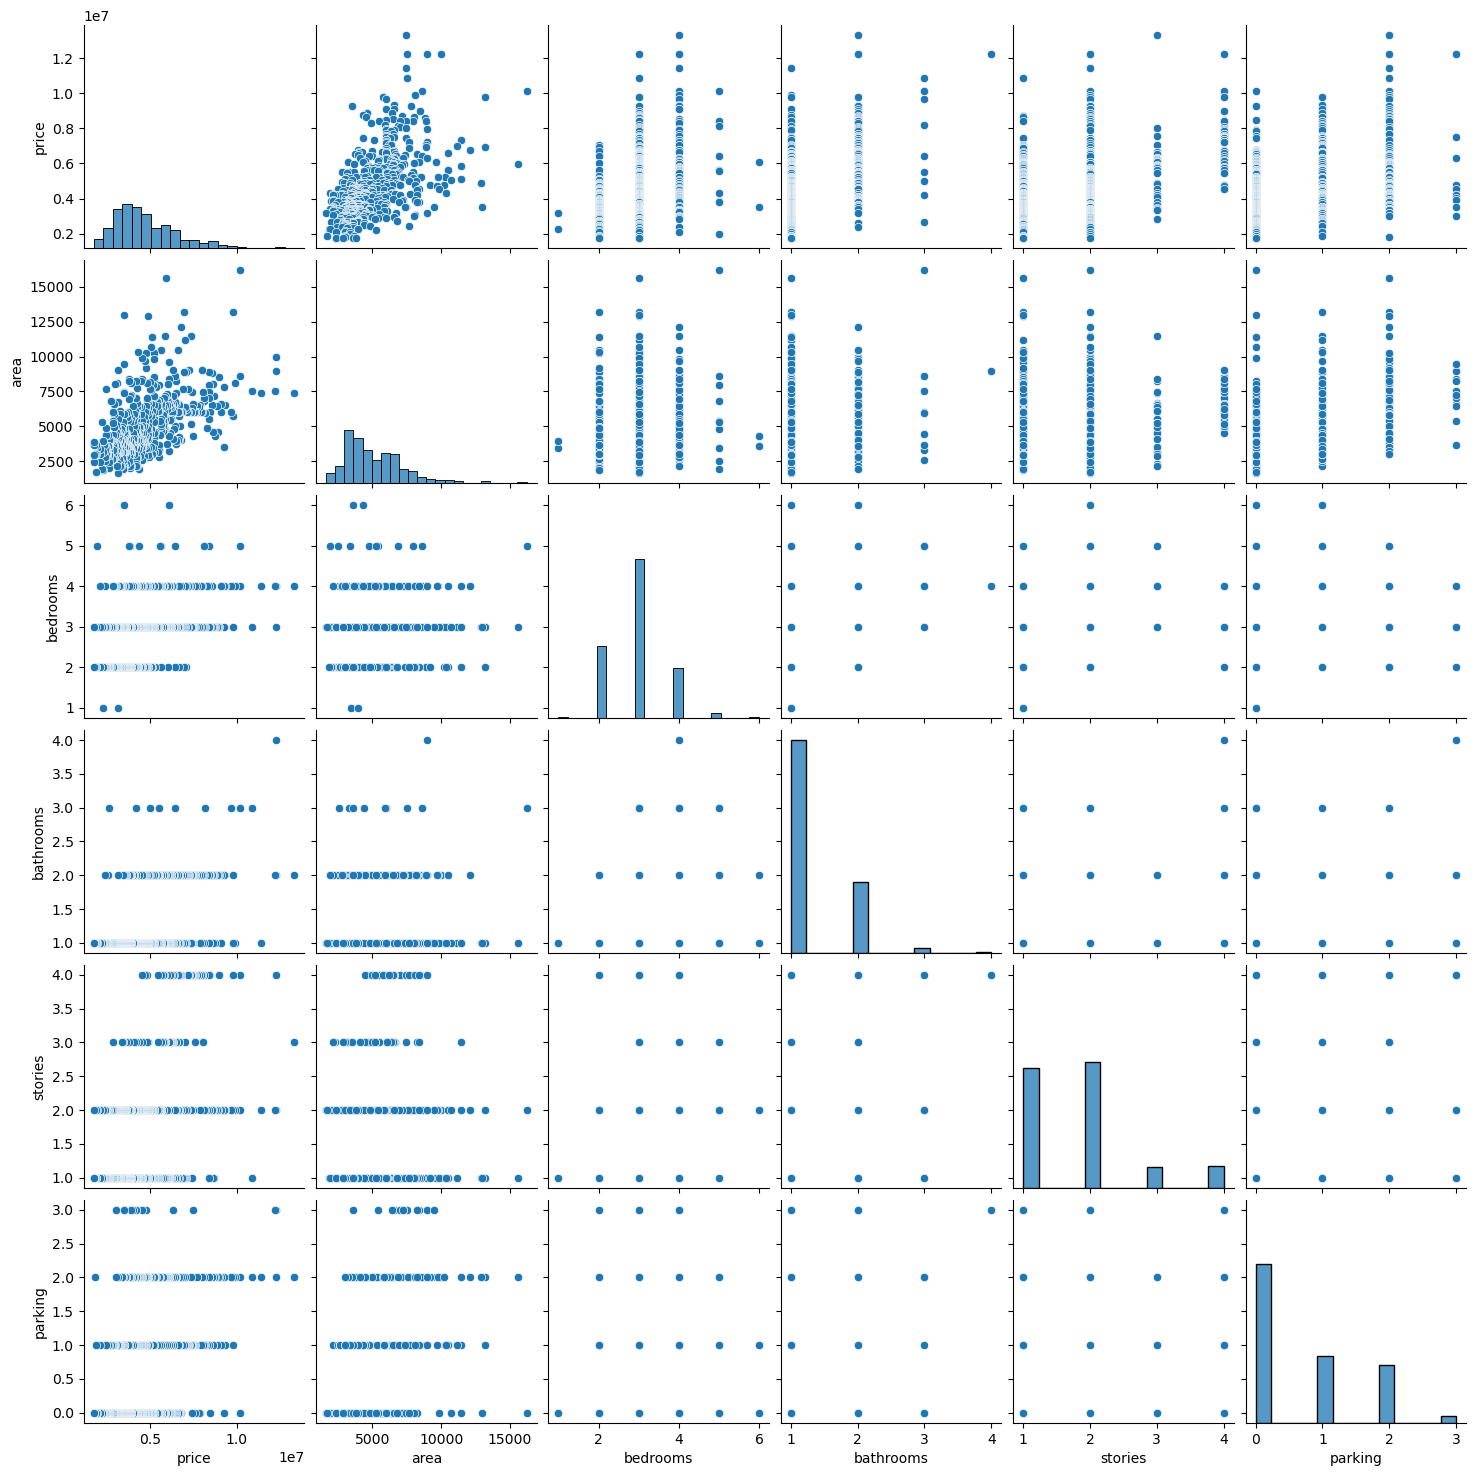

In [12]:
# Nuage des points
sns.pairplot(data=df_quant)

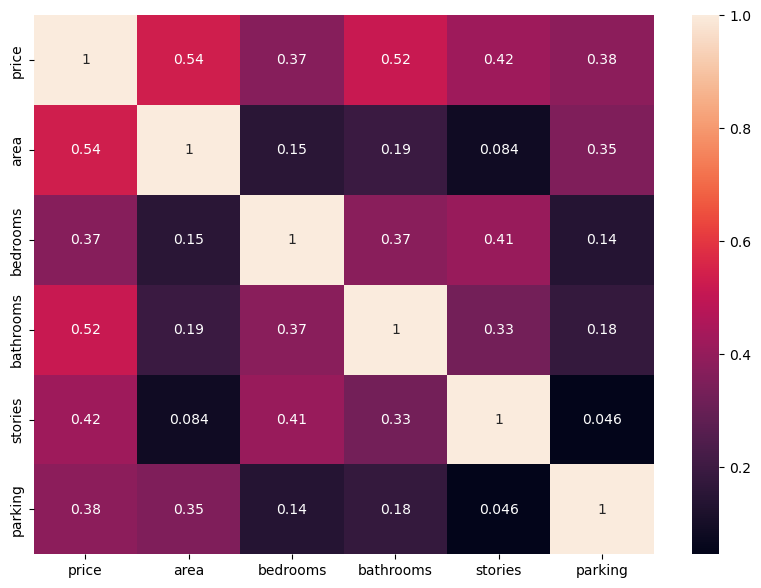

In [13]:
# Corrélation des variables
corr_matrix = df_quant.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr_matrix, annot = True)
plt.show()

## Traitement des outliers

In [14]:
# Identification des données aberrantes - IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(lower_bound)
    print(upper_bound)
    
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Trouver les outliers pour la colonne 'PRICE'
outliers = detect_outliers_iqr(df, 'price')

# Afficher les outliers
print("Outliers détectés:")
print(outliers)

-35000.0
9205000.0
Outliers détectés:
       price   area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0   13300000   7420         4          2        3      yes        no       no   
1   12250000   8960         4          4        4      yes        no       no   
2   12250000   9960         3          2        2      yes        no      yes   
3   12215000   7500         4          2        2      yes        no      yes   
4   11410000   7420         4          1        2      yes       yes      yes   
5   10850000   7500         3          3        1      yes        no      yes   
6   10150000   8580         4          3        4      yes        no       no   
7   10150000  16200         5          3        2      yes        no       no   
8    9870000   8100         4          1        2      yes       yes      yes   
9    9800000   5750         3          2        4      yes       yes       no   
10   9800000  13200         3          1        2      yes        no   

In [15]:
# Supprimer les outliers pour voir l'effet que cela fait sur le modèle
def remove_outliers_iqr_iterative(data, column):
    previous_shape = data.shape[0]
    while True:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filtrer les données pour garder uniquement les valeurs qui ne sont pas des outliers
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
        
        # Si la taille du DataFrame ne change plus, on arrête
        current_shape = data.shape[0]
        if current_shape == previous_shape:
            break
        previous_shape = current_shape
    
    return data

# Supprimer les outliers du prix
df_remove_outliers = remove_outliers_iqr_iterative(df, 'price')

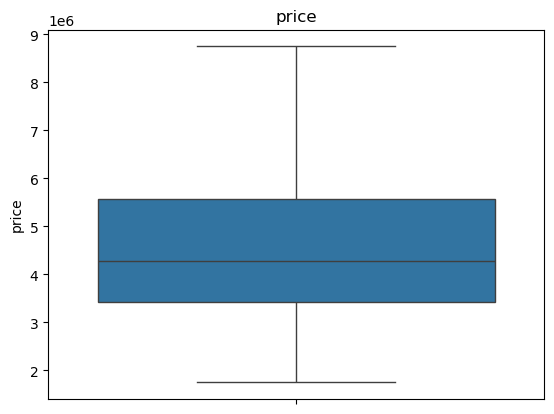

In [16]:
# Visualiser les outliers en utilisant un boxplot avec Seaborn

plt.title(f"price")
sns.boxplot(y='price', data=df_remove_outliers)
plt.show()

## Encodage des variables catégorielles

In [17]:
## Encoder les variables binaires
df_quant = df_remove_outliers.select_dtypes(include=['int', 'float'])
df_qualit = df_remove_outliers.select_dtypes(include=object)


for column in df_qualit.columns[:-1]:
    df_quant[f'{column}_binaire'] = df_qualit[column].map({'yes': 1, 'no': 0})

In [18]:
# Encodage du variable furnishingstatus
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False)
ohe_result = ohe.fit_transform(df_qualit[['furnishingstatus']])
df_ohe = pd.DataFrame(ohe_result, columns=ohe.get_feature_names_out(['furnishingstatus']))

# Rénitialiser les index
df_quant.reset_index(drop=True, inplace=True)
df_ohe.reset_index(drop=True, inplace=True)

df_encoded = pd.concat([df_quant, df_ohe], axis = 1)
df_encoded = df_encoded.drop(columns=['furnishingstatus_unfurnished'])

df_encoded.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_binaire,guestroom_binaire,basement_binaire,hotwaterheating_binaire,airconditioning_binaire,prefarea_binaire,furnishingstatus_furnished,furnishingstatus_semi-furnished
0,8750000,4320,3,1,2,2,1,0,1,1,0,0,0.0,1.0
1,8680000,7155,3,2,1,2,1,1,1,0,1,0,0.0,0.0
2,8645000,8050,3,1,1,1,1,1,1,0,1,0,1.0,0.0
3,8645000,4560,3,2,2,1,1,1,1,0,1,0,1.0,0.0
4,8575000,8800,3,2,2,2,1,0,0,0,1,0,1.0,0.0


## Division en Train et Test

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

train, test = train_test_split(df_encoded, test_size=0.2, random_state=42)

## Sélection des features sur la base train

In [20]:
# Description de la base train
train.describe

<bound method NDFrame.describe of        price  area  bedrooms  bathrooms  stories  parking  mainroad_binaire  \
220  4585000  3840         3          1        2        1                 1   
69   6440000  8580         5          3        2        2                 1   
362  3570000  3150         3          1        2        0                 1   
483  2660000  4000         3          1        1        0                 1   
173  5033000  4800         2          1        1        0                 1   
..       ...   ...       ...        ...      ...      ...               ...   
71   6419000  6750         2          1        1        2                 1   
106  5880000  7160         3          1        1        2                 1   
270  4200000  2610         4          3        2        0                 0   
435  3129000  5495         3          1        1        0                 1   
102  5950000  6254         4          2        1        1                 1   

     guestroom_bi

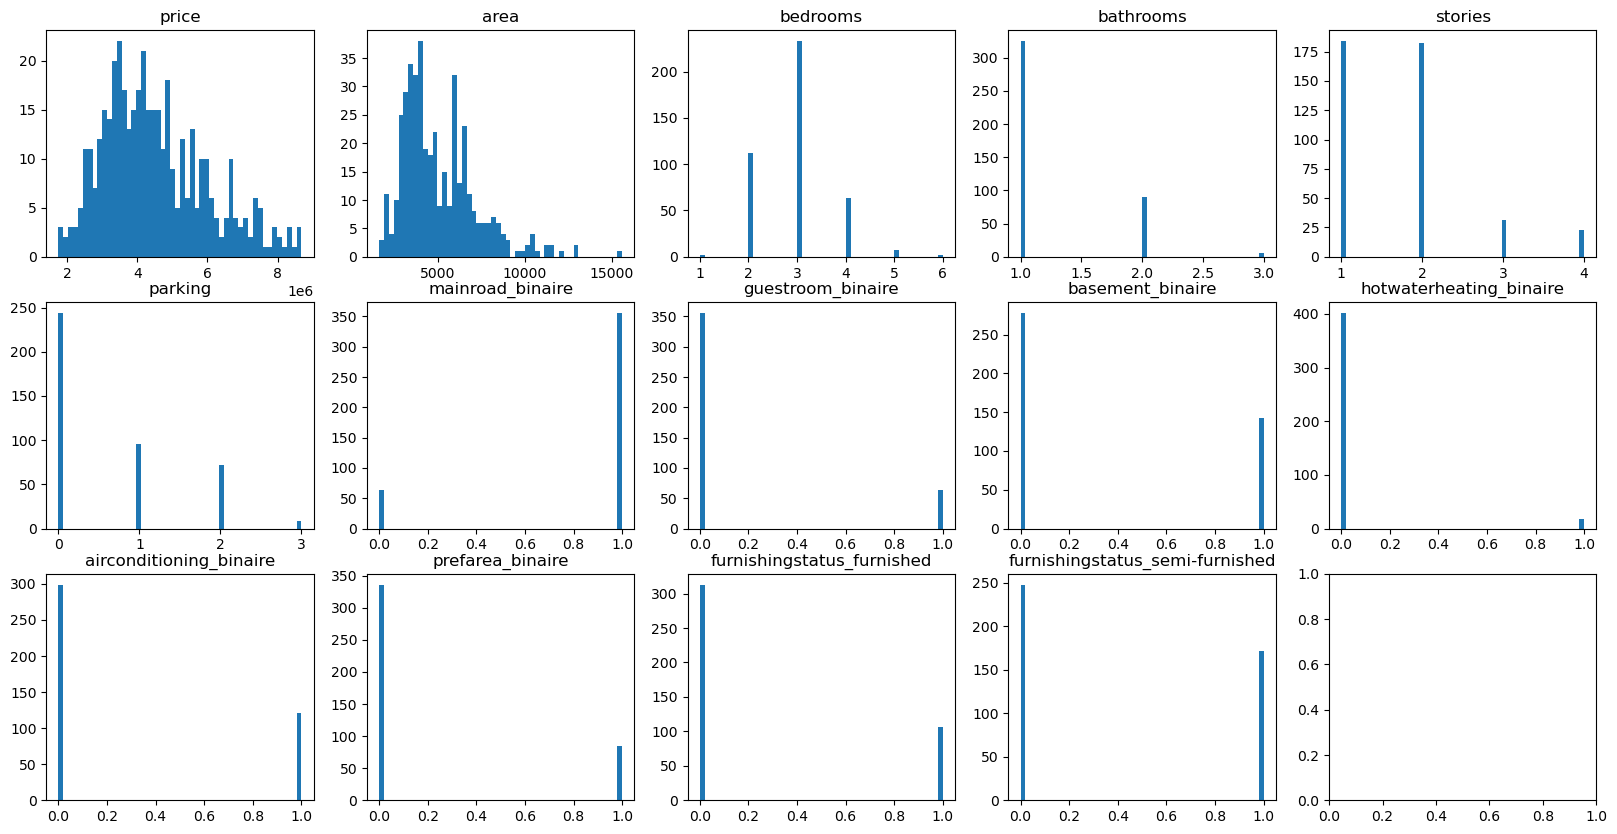

In [21]:
# Visualisation de la distribution des variables
fig, axs = plt.subplots(3, 5, figsize=(20, 10))
axs = axs.ravel()

for i, column in enumerate(train.columns):
    axs[i].hist(train[column], bins=50)
    axs[i].set_title(column)

plt.show()

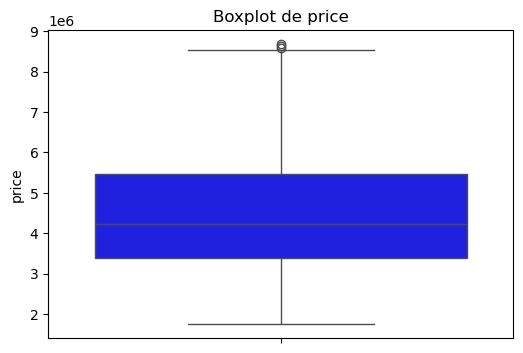

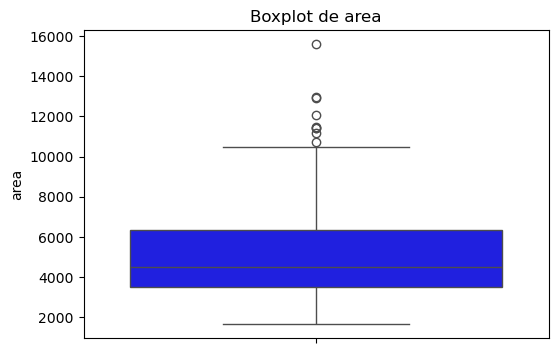

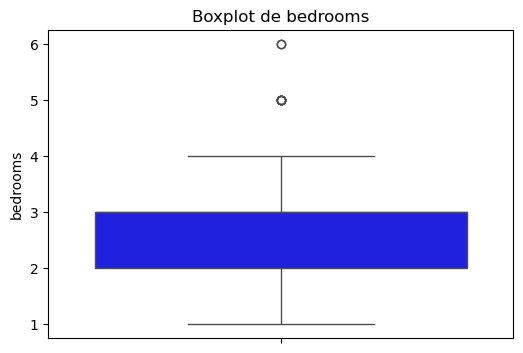

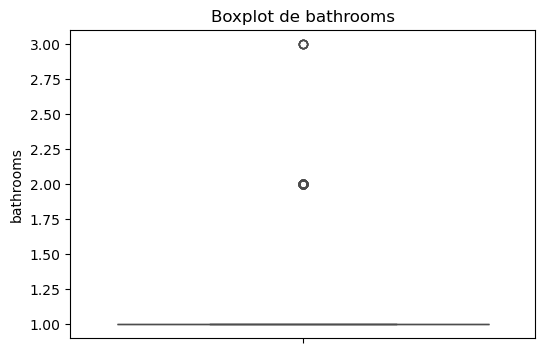

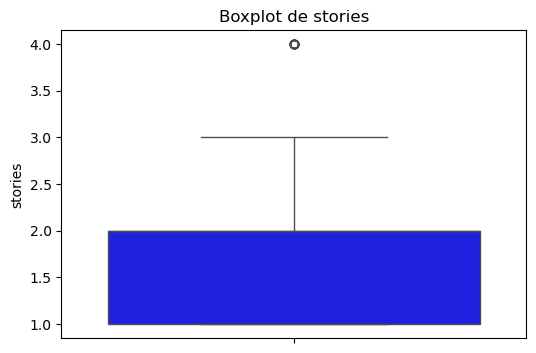

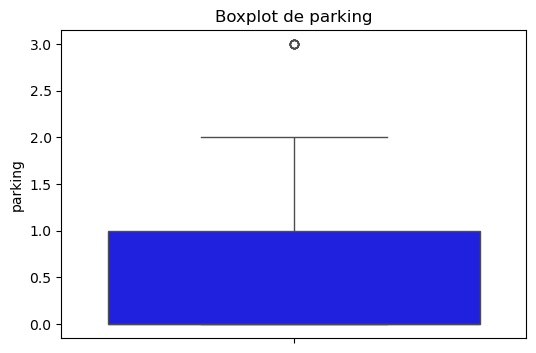

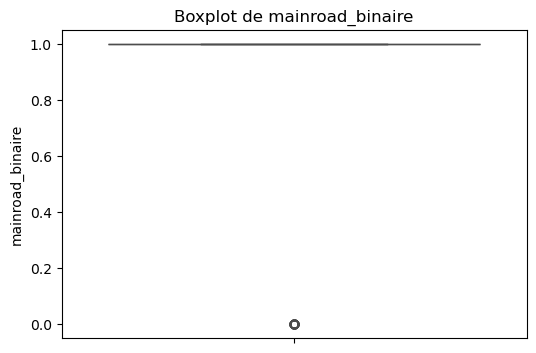

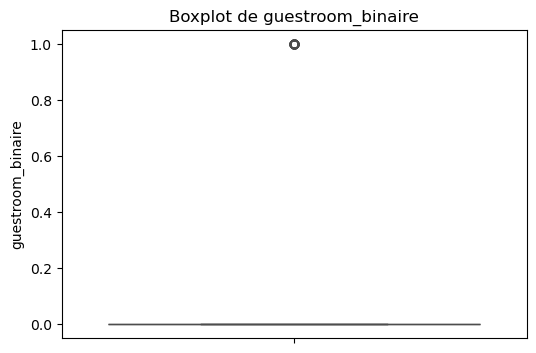

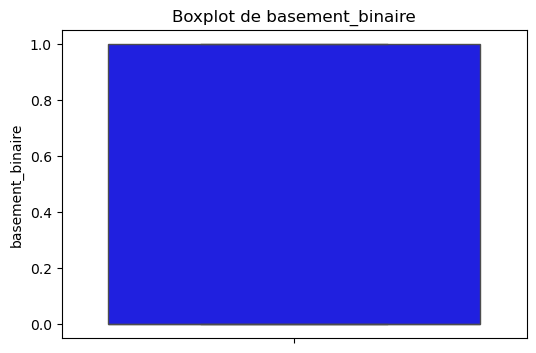

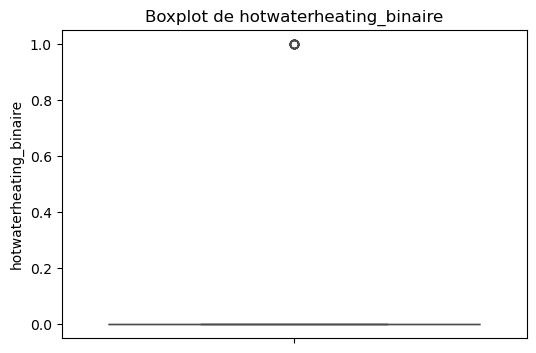

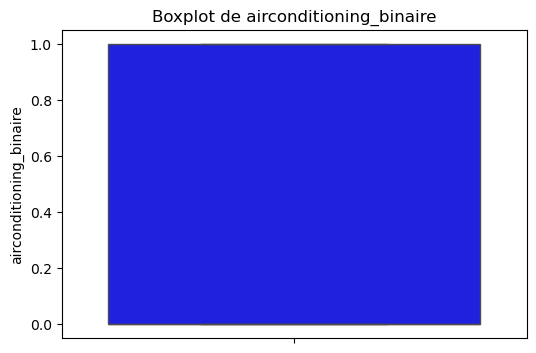

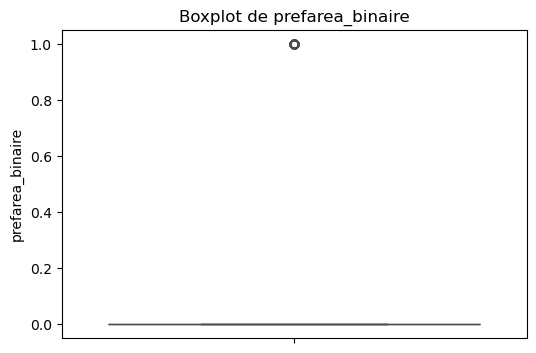

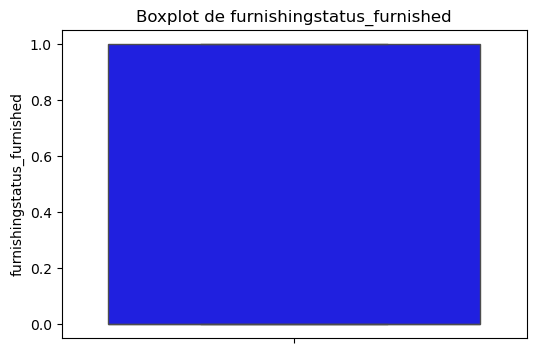

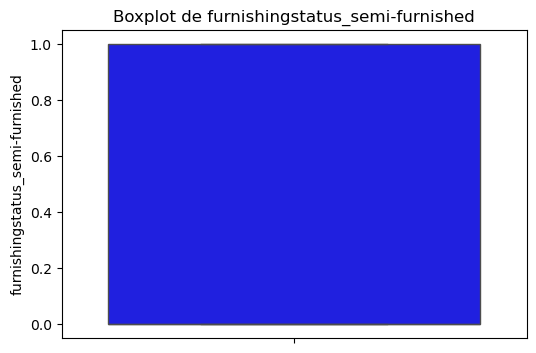

In [22]:
# Affichage des boxplots pour chaque variable numérique
num_cols = list(train.select_dtypes(include=["float64", "int64"]).columns)

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=train, y=col, color="blue")
    plt.title(f"Boxplot de {col}")
    plt.ylabel(col)
    plt.show()

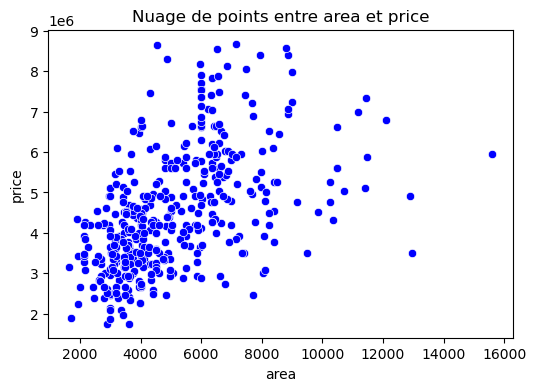

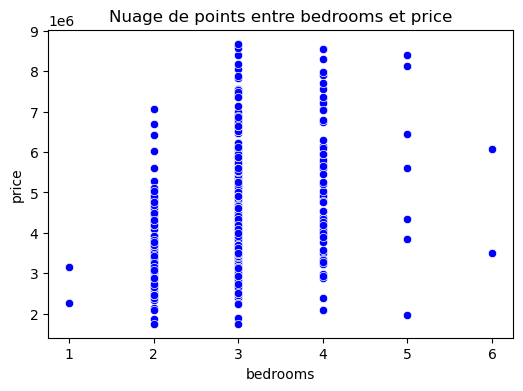

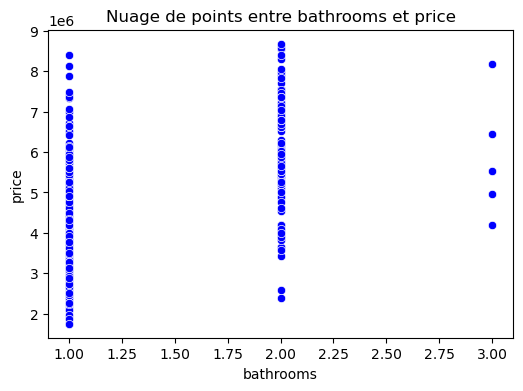

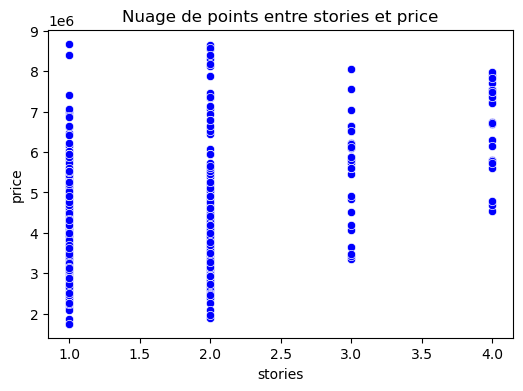

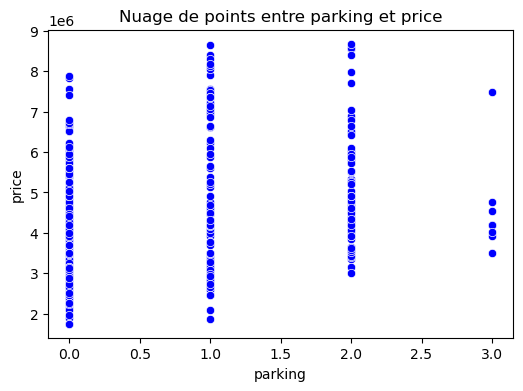

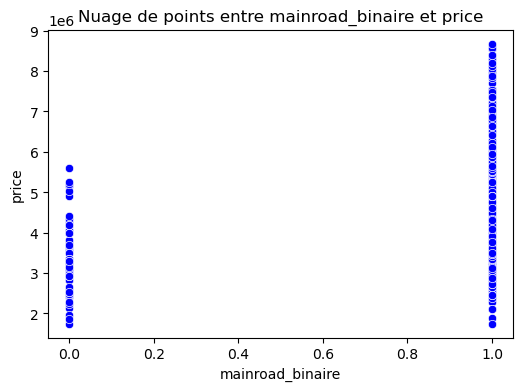

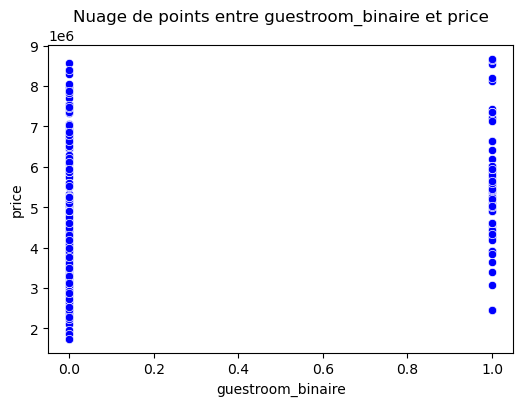

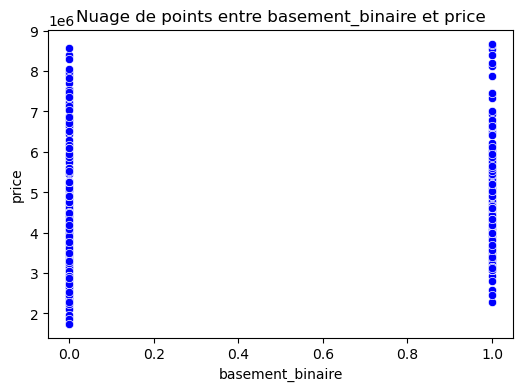

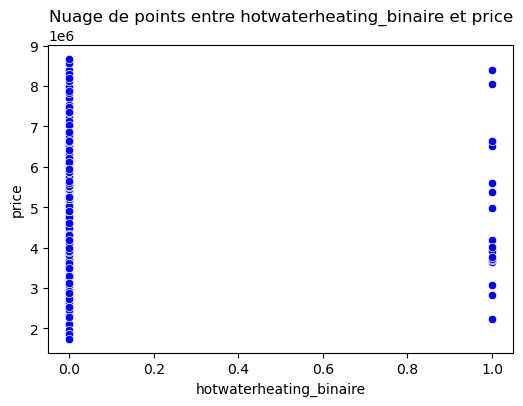

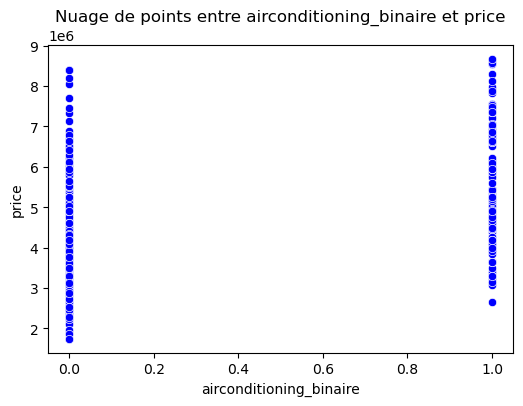

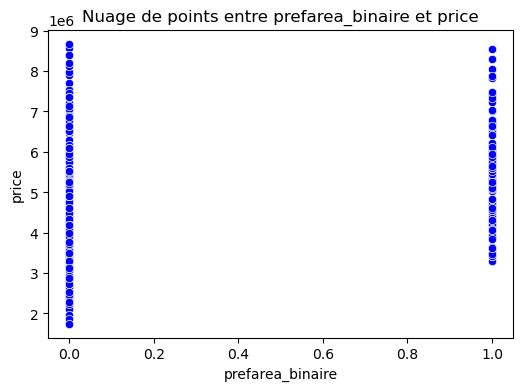

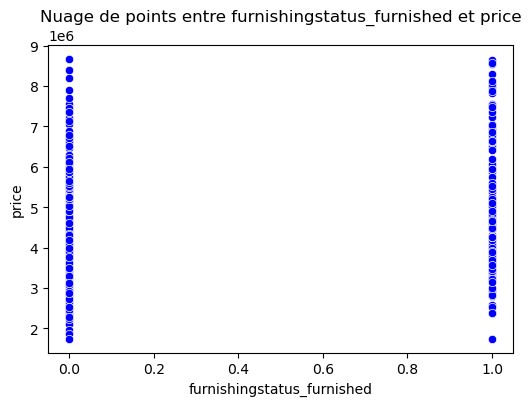

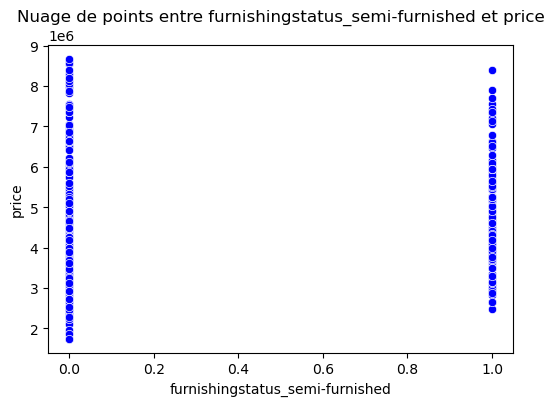

In [23]:
# Affichage des nuages de points entre la variable d'intérêt et toutes les autres variables
target_col = "price"
num_cols = list(train.select_dtypes(include=["float64", "int64"]).columns)
num_cols.remove(target_col)

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=train, x=col, y=target_col, color="blue")
    plt.title(f"Nuage de points entre {col} et {target_col}")
    plt.xlabel(col)
    plt.ylabel(target_col)
    plt.show()

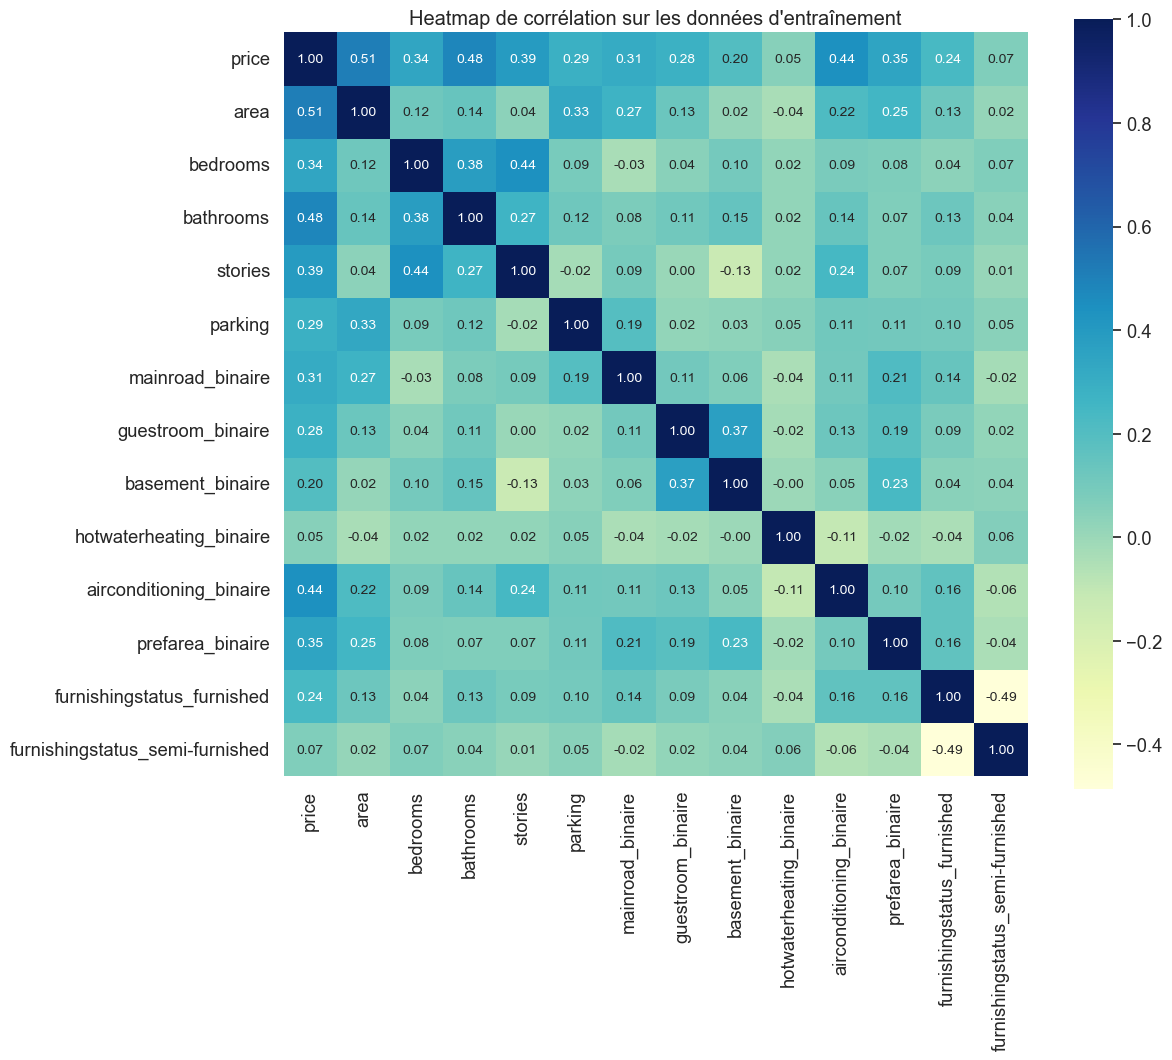

In [24]:
# Calcul de la matrice de corrélation sur les données d'entraînement
corr_matrix_train = train.corr()


sns.set(font_scale=1.2)
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_train, cmap="YlGnBu", annot=True, annot_kws={"size": 10}, square=True, fmt=".2f")

# Affichage du graphique
import matplotlib.pyplot as plt

plt.title("Heatmap de corrélation sur les données d'entraînement")
plt.show()

### Selection des variables à partir de la ocrrélation de pearson

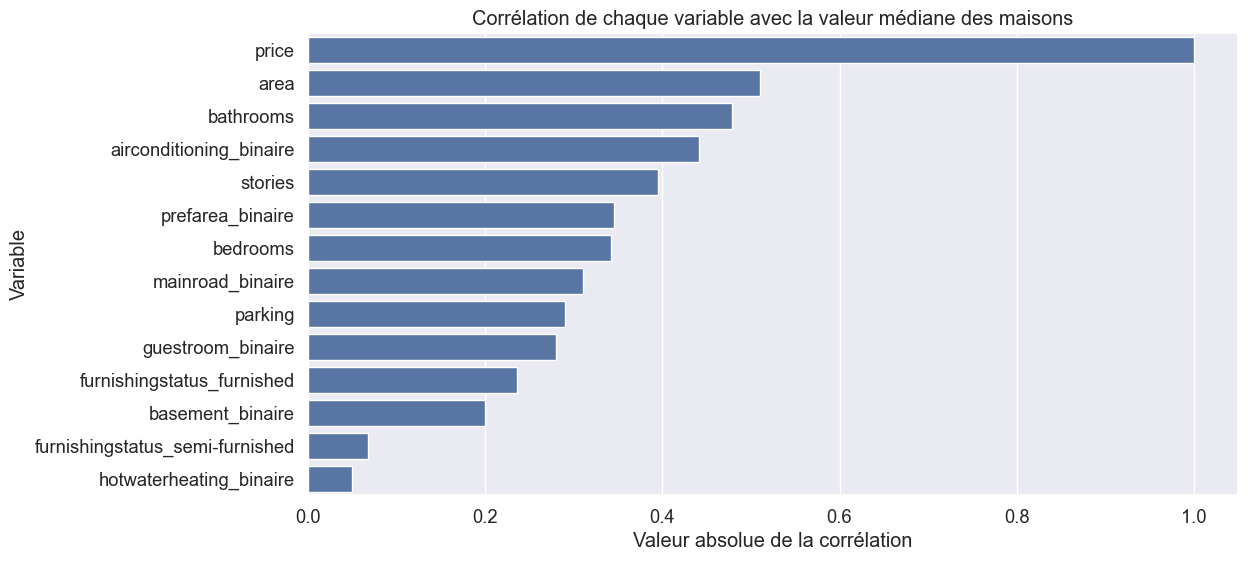

In [25]:
# Calcul de la corrélation entre chaque variable et la variable cible (en valeur absolue)
correlations = abs(train.corr()["price"]).sort_values(ascending=False)

# Représentation graphique des corrélations
plt.figure(figsize=(12, 6))
sns.barplot(x=correlations.values, y=correlations.index)
plt.xlabel("Valeur absolue de la corrélation")
plt.ylabel("Variable")
plt.title("Corrélation de chaque variable avec la valeur médiane des maisons")
plt.show()

## Modélisation sur la base train

In [26]:
import statsmodels.api as sm
# Séparation des variables prédictives et de la variable cible
X_train = train.drop(["price"], axis=1)
y_train = train["price"]


X_test = test.drop(["price"], axis=1)
y_test = test["price"]

# Fit du modèle linéaire
lr_model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

# Obtention du tableau de résultats
results_table = lr_model.summary2().tables[1]
results_table

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,258580.279891,223470.464055,1.157112,2.479071e-01,-180723.361516,6.978839e+05
area,208.808025,23.399660,8.923549,1.568815e-17,162.808407,2.548076e+02
bedrooms,108574.284780,70270.886425,1.545082,1.231055e-01,-29565.922794,2.467145e+05
bathrooms,842026.524086,106390.581573,7.914484,2.389651e-14,632881.346471,1.051172e+06
stories,394218.718922,63473.605728,6.210750,1.305962e-09,269440.770089,5.189967e+05
parking,136294.397018,56168.152202,2.426542,1.567800e-02,25877.685360,2.467111e+05
mainroad_binaire,405190.153615,129045.235191,3.139908,1.813580e-03,151509.910164,6.588704e+05
guestroom_binaire,424839.610316,131362.889659,3.234092,1.320099e-03,166603.265673,6.830760e+05
basement_binaire,256727.019416,103523.804751,2.479884,1.354721e-02,53217.420991,4.602366e+05
hotwaterheating_binaire,569363.323342,214809.894216,2.650545,8.350414e-03,147084.839523,9.916418e+05


In [27]:
lr_model.summary2().tables[0]

,0,1,2,3
0,Model:,OLS,Adj. R-squared:,0.649
1,Dependent Variable:,price,AIC:,12703.6848
2,Date:,2024-10-06 15:37,BIC:,12760.2484
3,No. Observations:,420,Log-Likelihood:,-6337.8
4,Df Model:,13,F-statistic:,60.48
5,Df Residuals:,406,Prob (F-statistic):,2.03e-86
6,R-squared:,0.659,Scale:,7.7508e+11


In [28]:
# Obtention des prédictions et des métriques d'évaluation
y_train_pred = lr_model.predict(sm.add_constant(X_train))
y_test_pred = lr_model.predict(sm.add_constant(X_test))
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

In [29]:
# Construction du tableau de résultats

df_metrics = pd.DataFrame({
    'Métrique': ['R2', 'MSE', 'RMSE'],
    'Train': [r2_train, mse_train, rmse_train],
    'Test': [r2_test, mse_test, rmse_test]
})

print(df_metrics)

  Métrique         Train          Test
0       R2  6.594749e-01  6.759715e-01
1      MSE  7.492397e+11  9.910555e+11
2     RMSE  8.655864e+05  9.955177e+05


##### Le modèle sans outliers offre de meilleures performances globales, avec un R² plus stable et une réduction significative des erreurs (MSE et RMSE). 
##### La suppression des outliers a probablement permis d'éliminer des points aberrants qui faussaient les prédictions du modèle avec outliers. Ce modèle semble donc plus fiable pour la prédiction des prix.
##### Cependant le modèle sans outliers pourrait ne pas être capable de prédire avec précision les prix des maisons très chères, car ces données extrêmes ne font pas partie de l'ensemble d'entraînement.

## Vérification des hypothèses du modèles

### Test de linearité

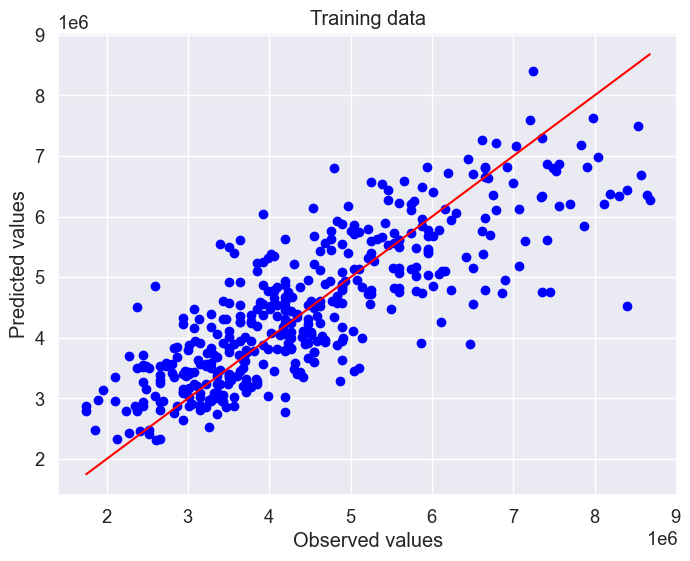

In [30]:
# Tracer les valeurs observées en fonction des valeurs prédites sur les données d'entraînement
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, color='blue')

# Tracer la ligne de régression idéale (y = x)
x_vals = np.linspace(min(y_train), max(y_train), 100)
plt.plot(x_vals, x_vals, color='red', label='Ligne de régression idéale (y = x)')


plt.xlabel('Observed values')
plt.ylabel('Predicted values')
plt.title('Training data')
plt.show()

##### Nous pouvons voir qu'il ne ya pas une relation lineaire parfaite

### Vérification de l'homoscedicité

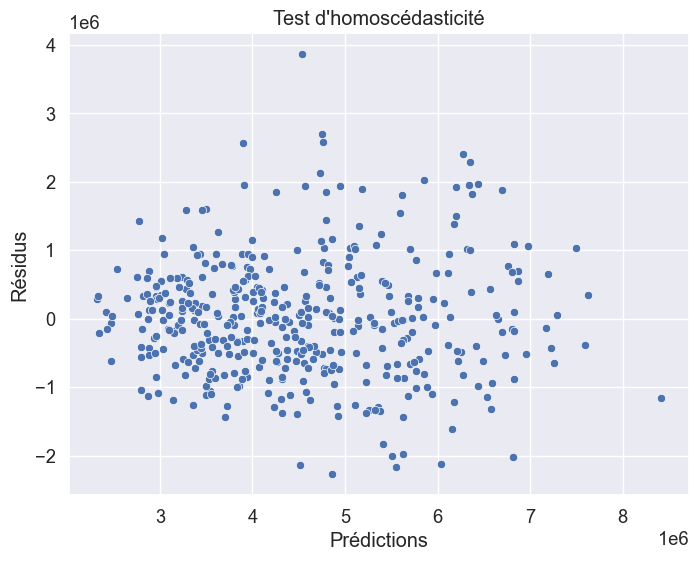

In [31]:
# Test d'homoscédasticité
y_train_pred = lr_model.predict(sm.add_constant(X_train))
residuals = y_train - y_train_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_train_pred, y=residuals)

plt.title('Test d\'homoscédasticité')
plt.xlabel('Prédictions')
plt.ylabel('Résidus')
plt.show()

In [32]:
# Test de Breush-Pagan 
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

#perform Bresuch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(lr_model.resid, lr_model.model.exog)

lzip(names, test)

[('Lagrange multiplier statistic', 38.99568476548241),
 ('p-value', 0.00020026091221742363),
 ('f-value', 3.1964604683203612),
 ('f p-value', 0.00013358863579661135)]

##### L'homoscedicité n'est pas verifiée.

### Vérification de la multicolinéarité

In [33]:
# Test de multicollinéarité
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["features"] = X_train.columns
print(vif)

    VIF Factor                         features
0     8.202317                             area
1    17.057403                         bedrooms
2    10.328062                        bathrooms
3     8.096533                          stories
4     1.831210                          parking
5     6.466210                 mainroad_binaire
6     1.421196                guestroom_binaire
7     1.957467                 basement_binaire
8     1.069665          hotwaterheating_binaire
9     1.637612          airconditioning_binaire
10    1.459021                 prefarea_binaire
11    1.918476       furnishingstatus_furnished
12    2.270329  furnishingstatus_semi-furnished


##### Certaines variables ont des problèmes de multicolinéarité

### Vérification de la normalité des erreurs

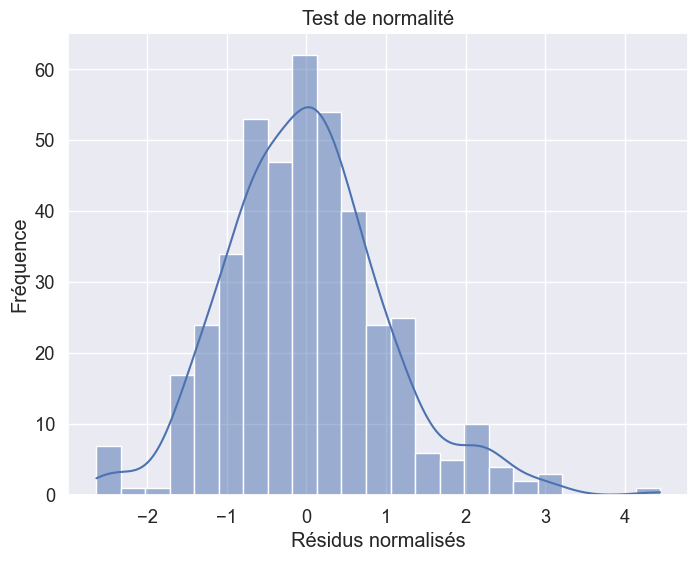

In [34]:
# Test de normalité
resid_norm = lr_model.get_influence().resid_studentized_internal
plt.figure(figsize=(8, 6))
sns.histplot(resid_norm, kde=True)
plt.title('Test de normalité')
plt.xlabel('Résidus normalisés')
plt.ylabel('Fréquence')
plt.show()

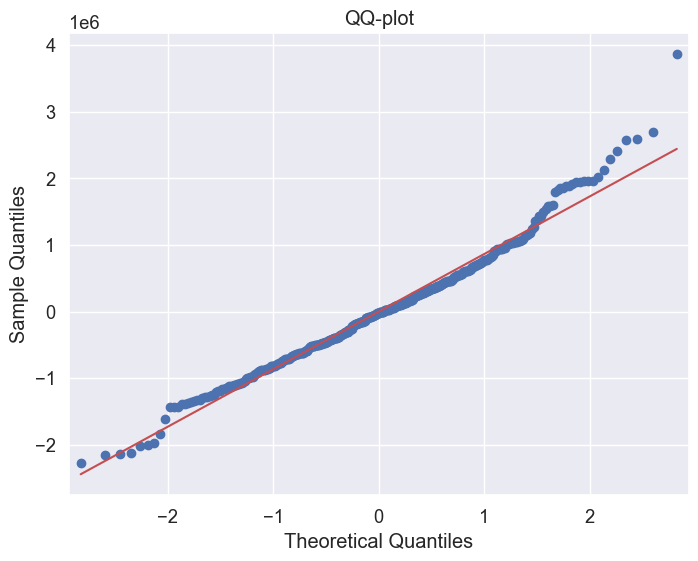

In [35]:
# QQ-plot
fig, ax = plt.subplots(figsize=(8, 6))
sm.qqplot(residuals, line='s', ax=ax)
ax.set_title('QQ-plot')
plt.show()

In [36]:
import scipy.stats as stats

# Test de Shapiro-Wilk
shapiro_test = stats.shapiro(residuals)

# Test d'Anderson-Darling
anderson_test = stats.anderson(residuals, dist='norm')

# Test de Kolmogorov-Smirnov
ks_test = stats.kstest(residuals, 'norm')

# Mettre les résultats dans un dataframe
df_normality = pd.DataFrame({
    'Test de normalité': ['Shapiro-Wilk', 'Anderson-Darling', 'Kolmogorov-Smirnov'],
    'Statistique': [shapiro_test.statistic, anderson_test.statistic, ks_test.statistic],
    'p-value': [shapiro_test.pvalue, 'N/A', ks_test.pvalue]
})

# Afficher le tableau
print(df_normality)

    Test de normalité  Statistique   p-value
0        Shapiro-Wilk     0.980357  0.000018
1    Anderson-Darling     1.717629       N/A
2  Kolmogorov-Smirnov     0.516667       0.0


##### La normalité des termes d'erreur n'est pas vérifiée.

### Vérification de l'autocorrélation

In [37]:
from statsmodels.stats.stattools import durbin_watson
# Test d'autocorrélation
dw_test = durbin_watson(lr_model.resid)
print("Test de Durbin-Watson : statistique = %f" % dw_test)

Test de Durbin-Watson : statistique = 2.103959


#### Pas d'autocorrélation